# TP SVM

Save the notebook as either PDF or HTML and make sure all the results are saved correctly (I won't run them and the original format does not save the results automatically), **and put your name in the filename**.

<div class="alert alert-success"> 
<b>Questions are in green boxes.</b>
The maximum time you should spend on each question is given as indication only. If you take more time than that, then you should come see me.
</div>
<div class="alert alert-info" role="alert"><b>Analyzes are in blue boxes.</b> You should comment on your results in theses boxes (Is it good? Is it expected? Why do we get such result? Why is it different from the previous one? etc)
</div>

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

For this lab, we will use the [MNIST dataset (~15Mo)](https://en.wikipedia.org/wiki/MNIST_database). It consists of 28x28 images (loaded as a 784 vector) and the associated label for training, validation and test sets. 

The following code loads a subset of 1000 training samples and 500 validation samples.

[-1. -1. -1. -1. -1.  1. -1. -1. -1. -1.]


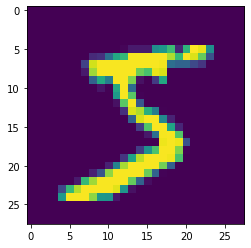

In [2]:
# Load the dataset
data = np.load('mnist1k.npz')
X_train = data['X_train']
y_train = jax.nn.one_hot(data['y_train'], num_classes=10)*2-1
X_val = data['X_val']
y_val = jax.nn.one_hot(data['y_val'], num_classes=10)*2-1
X_train_bin = data['X_train_bin']
y_train_bin = data['y_train_bin']*2-1
X_val_bin = data['X_val_bin']
y_val_bin = data['y_val_bin']*2-1
N_train = len(y_train)
N_val = len(y_val)
plt.imshow(X_train[0,:].reshape(28,28))
print(y_train[0])

Next, we define the 0-1 loss that measures the error rate of a classifier.

In [3]:
def error_rate(y_hat, y):
    return (1.!=jnp.sign(y_hat*y)).mean()

def multi_error_rate(y_hat, y):
    return (1.*(jnp.argmax(y_hat, axis=1) != jnp.argmax(y, axis=1))).mean()

## Implementing a binary Kernel SVM


<div class="alert alert-success"> <b> Q1.</b> Implement the code of the binary kernel SVM classifier in the following class using Stochastic Dual Coordinate Ascent (SDCA). It has to work for any kernel function like the provided linear kernel I found around 1% error (compared to 50% for random guesses). <i>(Indicative time: about 30 minutes to code, should run in less than 10 seconds)</i>
</div>


In [4]:
'''
takes arguements 
x1: m x d
x2: n x d
return the Gram matrix m x n
'''
def LinearKernel(x1, x2):
    return jnp.matmul(x1, x2.T)

In [5]:
class KernelSVM():
    def __init__(self, X, y, kernel=LinearKernel, C=100.0, epochs=10):
        self.X = X
        self.y = y
        self.alpha = None
        self.kernel = kernel
        self.C = C
        # training code goes here
    
    '''
    x is a matrix nxd of n samples of dimension d
    returns a vector of size n containing the prediction of the class
    '''
    def __call__(self, x):
        return

We first try a Linear on the training set reduce to digits 0 and 1 to check that our code works. 

In [6]:
%%time
svm = KernelSVM(X_train_bin, y_train_bin, LinearKernel)
y_hat = svm(X_val_bin)
err = error_rate(y_hat, y_val_bin)
print(err)

0.009345794
CPU times: user 5.09 s, sys: 4.26 ms, total: 5.1 s
Wall time: 5.1 s


<div class="alert alert-info" role="alert"><b>Analyze your results in this box.</b>  Answer
</div>

<div class="alert alert-success"> <b> Q2.</b> Use cross-validation to find the optimal number of epochs for training, up to a maximum of 25, and the optimal value of $C$. <i>(Indicative time: about 10 minutes to code, less than 10 minutes to run by testing 4 values for C and 4 values for E)</i>
</div>


In [ ]:
%%time 


<div class="alert alert-info" role="alert"><b>Analyze your results in this box.</b>  Answer
</div>

## Multi-class classification

Next, we want to perform a multiclass classification using our SVM. We will use the One-versus-All approach where we train a classifier for each class against all others. A test time, we select the class corresponding to the classifier that output the maximum score.

<div class="alert alert-success"> <b> Q3.</b>Code a Multi-class SVM using a One-versus-All approach and validate it on the validation set. <i>(Indicative time: about 15 minutes to code, it should run almost as fast as the binary version)</i>
</div>

In [8]:
class OnevsAllKSVM():
    def __init__(self, X, y, kernel=LinearKernel, epochs=2, C=1.0):        
        self.X = X
        self.y = y
        self.alpha = None
        self.kernel = kernel
        self.C = C
        
        # training code goes here
                
        
    def __call__(self, X):
        # return a score for each class
        return

In [9]:
%%time
svm = OnevsAllKSVM(X_train, y_train, LinearKernel)
y_hat = svm(X_val)
err = multi_error_rate(y_hat, y_val)
print(err)

0.20400001
CPU times: user 9.39 s, sys: 4.04 ms, total: 9.39 s
Wall time: 9.34 s


<div class="alert alert-info" role="alert"><b>Analyze your results on the full training set in this box.</b>  Answer
</div>

## Kernels

A linear classifier is unlikely to be able to classify correctly all classes, we will thus try several different kernels.

<div class="alert alert-success"> <b> Q4.</b> Code a class for the Gaussian kernel, the polynomial kernel and the inhomogeneous polynomial kernel, and perform cross-validation to select a kernel and its hyperparameters. <i>(indicative time: about 10 minutes to code per kernel. Should not take significantly more time than the linear kernel, e.g., maximum 30 seconds per run)</i>
</div>

In [11]:
class GaussKernel():
    def __init__(self, gamma=1.0):
        self.gamma = gamma
    '''
    compute the Gram Matrix
    '''
    def __call__(self, x1, x2):
        return jnp.zeros((x1.shape[0], x2.shape[0]))

class PolyKernel():
    def __init__(self, d=1.0, c=0.):
        self.d = d
        self.c = c
    '''
    compute the Gram Matrix
    '''
    def __call__(self, x1, x2):
        return jnp.zeros((x1.shape[0], x2.shape[0]))

In [ ]:
%%time

<div class="alert alert-info" role="alert"><b>Analyze your results on the full training set in this box.</b>  Answer
</div>

Since support vectors are images we can visualize which training examples were contributing the most to the decision.


<div class="alert alert-success"> <b>Q5.</b> For the best performing kernel, visualize the support vectors (limit to the ones with largest absolute weights). <i>(Indicative time: about 10 inutes to code. Should run instanteanously as there is no additional computation)</i></div>

<div class="alert alert-info" role="alert"><b>Analyze your results on the full training set in this box.</b>  Answer
</div>

## 2 dimensionnal visualization

In order to visualize the boundaries between the classes, we want to project all data into a 2 dimensional space using PCA, and then perform the classification there.

<div class="alert alert-success"> <b>Q6.</b> Implement a trainable kernel that performs a PCA projection followed by a Gaussian kernel and draw a scatter plot of the validation samples along with color coded region of each class using pcolormesh. <i>(Indicative time: may take you more than 30 minutes to code, should run in less than 30 seconds)</i></div>

In [14]:
class PCAGaussKernel():
    def __init__(self, gamma=1.0, d=2):
        self.gamma = gamma
        self.d = d
        self.P = None
        self.mu = None
    
    '''
    train self.mu and self.P
    '''
    def fit(self, X):
        # training code goes here
        
        return self
    
    '''
    project examples with self.mu and self.P
    '''
    def project(self, X):
        return (X - self.mu)@self.P
    
    '''
    return the Gram matrix of the projected samples under the Gaussian kernel
    '''
    def __call__(self, x1, x2, project=True):
        # projection and kernel matrix code
        return


In [ ]:
%%time

<div class="alert alert-info" role="alert"><b>Analyze your results on the full training set in this box.</b>  Answer
</div>

<div class="alert alert-warning"> <b>Q7 [Optional].</b> Modify your training procedure such that it optimizes all classifiers at each step, instead of training fully each classifier one after another and make a video of the evolution of the prediction boundary  during training. <i>(Indicative time: May very well take you more than an hour of coding and running time can be more than 10 monutes because each iteration has to draw an image)</i></div>

<div class="alert alert-info" role="alert"><b>Analyze your results on the full training set in this box.</b>  Answer
</div>